# Lab 3.1 | A *whirlwind tour* of `PyTorch`: **the basics**

Advanced Topics in Machine Learning -- Fall 2023, UniTS

<a target="_blank" href="https://colab.research.google.com/github/ganselmif/adv-ml-units/blob/main/notebooks//AdvML_UniTS_2023_Lab_03_DL_with_PyTorch/AdvML_UniTS_2023_Lab_03_DL_with_PyTorch_01_basics.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

**NOTE:** This notebook is the same as the *solved* version.

[PyTorch](https://pyth.org/) is a Python/C++ framework for:
- Efficient numerical computing, with support for strong GPU acceleration & parallelism;
- Automatic algorithmic differentiation (mainly in *reverse mode*, *tape-based*; but more recently also in *forward mode*);
- Development of deep artificial neural models (a.k.a. *deep learning*);

It is also well integrated with the *scientific Python stack*.

The flexibility of PyTorch and its *Pythonic* interfaces make it the most widely adopted framework for research and development, both in academia and industry (especially industrial *R&D*).

For more info about `PyTorch`, you can have a look at the [official documentation](https://pytorch.org/docs/stable/index.html) or refer to [this book](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf).  
For insights about the inner workings of *autodiff*, you can start exploring the topic from [this survey](https://arxiv.org/abs/1502.05767).

In [1]:
# Optional
# pip install icecream

In [2]:
# It all begins with...
import torch
import torch as th  # (Not necessary; a shorthand)

import numpy as np  # For comparison

import matplotlib.pyplot as plt  # For plotting

from icecream import ic  # For pretty-printing variables

ic.configureOutput(prefix="\n|> ")  # For pretty-printing variables

from torch import Tensor  # For type annotations
from numpy.typing import NDArray  # For type annotations
from typing import Any  # For type annotations

## Basic operation with `Tensor`s

The main building block of PyTorch's linear algebra capabilities is the `Tensor` class. A torch `Tensor` is the (loose) equivalent of NumPy's `ndarray` and most of the functionalities are the same as in NumPy. In general, it is always possible to perform the same logical/mathematical operations typical of NumPy on torch `Tensor`s.

In [3]:
x: Tensor = th.tensor([[1, 2, 3], [4, 5, 6]])
y: NDArray[Any] = np.array([[1, 2, 3], [4, 5, 6]])

_ = ic(x)
_ = ic(y)

|> x: tensor([[1, 2, 3],
               [> x: tensor([[1, 2, 3],
               [4, 5, 6]])
|> y: array([[1, 2, 3],
              [4, 5, 6]])


In [4]:
# Shapes and sizes
_ = ic(x.size())
_ = ic(x.shape)

_ = ic(y.shape)

|> x.size(): torch.Size> x.size(): torch.Size([2, 3])
|> x.shape: torch.Size([2, 3])
|> y.shape: (2, 3)


In [5]:
# (d)types
_ = ic(x.dtype)
_ = ic(y.dtype)

|> x.dtype: torch.int64
> x.dtype: torch.int64
|> y.dtype: dtype('int64')


In [6]:
# (d)types "casting"
print("dtype of x before casting:", x.dtype)
x: Tensor = x.float()
print("dtype of x after casting:", x.dtype)

dtype of x before casting: torch.int64
dtype of x after casting: torch.float32


In [7]:
# Or with more granular control
x: Tensor = x.to(dtype=th.float16)
print("dtype of x:", x.dtype)

dtype of x: torch.float16


Note that you can build a tensor through the constructor `th.Tensor` (as opposed to `torch.tensor`, mind the capitalisation!). In this case, since `th.Tensor` is an alias for `th.FloatTensor`, the tensor you create will have type `th.float32`.

More info on data types [here](https://pyth.org/docs/stable/tensors.html).

Tensor slicing works exactly like in NumPy, by means of square brackets:

In [8]:
x: Tensor = th.rand(2, 3, 2)
_ = ic(x)

|> x: tensor([[[0.2516, 0.5426],> x: tensor([[[0.2516, 0.5426],
                [0.3589, 0.3382],
                [0.6716, 0.9616]],
       
               [[0.2841, 0.4554],
                [0.1629, 0.5155],
                [0.3716, 0.1191]]])


In [9]:
_ = ic(x[0, 1, 1])

_ = ic(x[0, 1:, 1])

_ = ic(x[:, ::2, :])

|> x[0, 1, 1]: tensor> x[0, 1, 1]: tensor(0.3382)
|> x[0, 1:, 1]: tensor([0.3382, 0.9616])
|> x[:, ::2, :]: tensor([[[0.2516, 0.5426],
                           [0.6716, 0.9616]],
                  
                          [[0.2841, 0.4554],
                           [0.3716, 0.1191]]])


In [10]:
# Note: 0-dimensional tensors vs 1-dimensional tensors
_ = ic(x[0, 1, 1].shape)

_ = ic(th.tensor(3.14).shape)

_ = ic(th.tensor([3.14]).shape)

|> x[0, 1, 1].shape> x[0, 1, 1].shape: torch.Size([])
|> th.tensor(3.14).shape: torch.Size([])
|> th.tensor([3.14]).shape: torch.Size([1])


In [11]:
# Use of `numel`
_ = ic(x.numel())

_ = ic(th.tensor(3.14).numel())

_ = ic(th.tensor([3.14]).numel())

|> x.numel(): 12
> x.numel(): 12
|> th.tensor(3.14).numel(): 1
|> th.tensor([3.14]).numel(): 1


### Tensor reshaping

Changing the shape of a tensor can be a crucial operation. To have an idea of its application, just think of `RGB` images.
These may be represented as $3\times H\times W$ tensors, where H and W stand for height and width of the image (in number of pixels). It is often needed to look at an image as a flattened (1D) vector of pixels:

In [12]:
img: Tensor = th.stack(
    tensors=(th.ones(8, 8), th.zeros(8, 8), th.ones(8, 8) / 2), dim=0
)

img.reshape(
    3, 64
)  # note that reshaping is not in place, so this call does not change the actual shape of img

_ = ic(img.shape)
img2: Tensor = img.reshape(3, 64)
_ = ic(img2.shape)

|> img.shape: torch.Size([> img.shape: torch.Size([3, 8, 8])
|> img2.shape: torch.Size([3, 64])


In [13]:
# plt.imshow(img.numpy())    # It errors: `TypeError: Invalid shape (3, 8, 8) for image data`

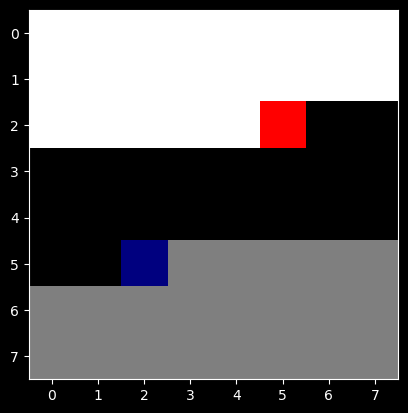

In [14]:
new_img: Tensor = img.reshape(8, 8, 3)
_ = plt.imshow(new_img.numpy())

**Note**

Difference between:
- `view`: operations on contiguous memory;
- `reshape`: operations on (non-)contiguous memory, using `view` wherever possible;
- `permute`: explicit reordering of dimensions and memory;
- `.contiguous()`: ensure that the tensor is stored in contiguous memory, with no other modification.

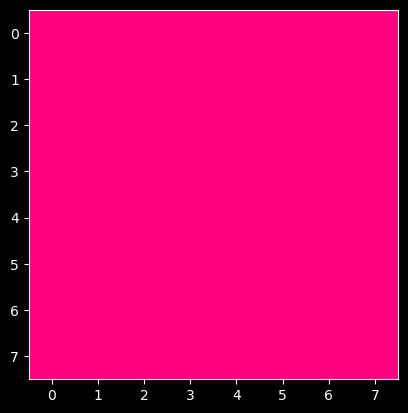

In [15]:
new_img: Tensor = img.permute(1, 2, 0)
_ = plt.imshow(new_img.numpy())

In [16]:
# See also:
z: Tensor = th.tensor([[1, 2, 3], [4, 5, 6]])
y: Tensor = z.t()  # Transposition does not guarantee memory contiguity!
_ = ic(y.size())
# ic(y.view(6))   # It errors!
_ = ic(y.contiguous().view(6))

|> y.size(): torch.Size([3, 2])
> y.size(): torch.Size([3, 2])
|> y.contiguous().view(6): tensor([1, 4, 2, 5, 3, 6])


### Linear algebra

In [17]:
x: Tensor = th.rand(4, 5)
y: Tensor = x.T  # matrix transposition; also .t()

# All the same!
_ = ic(x @ y)
_ = ic(x.matmul(y))
_ = ic(th.matmul(x, y))

|> x @ y: tensor([[> x @ y: tensor([[1.5202, 0.9676, 1.2438, 0.4088],
                   [0.9676, 2.0481, 1.2334, 0.7898],
                   [1.2438, 1.2334, 1.4995, 0.6067],
                   [0.4088, 0.7898, 0.6067, 0.5024]])
|> x.matmul(y): tensor([[1.5202, 0.9676, 1.2438, 0.4088],
                         [0.9676, 2.0481, 1.2334, 0.7898],
                         [1.2438, 1.2334, 1.4995, 0.6067],
                         [0.4088, 0.7898, 0.6067, 0.5024]])
|> th.matmul(x, y): tensor([[1.5202, 0.9676, 1.2438, 0.4088],
                             [0.9676, 2.0481, 1.2334, 0.7898],
                             [1.2438, 1.2334, 1.4995, 0.6067],
                             [0.4088, 0.7898, 0.6067, 0.5024]])


Please note that the operator for matrix multiplication is `@`, not `*`, which indicates the Hadamard (element-wise) product instead.

In [18]:
_ = ic(x * x)

|> x * x: tensor([[1.4472e-02, > x * x: tensor([[1.4472e-02, 1.0694e-01, 6.4369e-01, 4.3950e-01, 3.1561e-01],
                   [8.5509e-01, 5.4028e-01, 8.2724e-04, 5.8356e-02, 5.9352e-01],
                   [2.9618e-01, 4.4405e-02, 6.7896e-01, 8.9673e-03, 4.7096e-01],
                   [3.7688e-01, 6.1162e-02, 5.8633e-02, 5.2912e-03, 4.2259e-04]])


Multiplying a matrix by itself is obviously equivalent to computing its power, and it can be done also by running one of the following commands:

In [19]:
_ = ic(th.pow(x, 2))
_ = ic(x**2)

|> th.pow(x, 2): tensor([[> th.pow(x, 2): tensor([[1.4472e-02, 1.0694e-01, 6.4369e-01, 4.3950e-01, 3.1561e-01],
                          [8.5509e-01, 5.4028e-01, 8.2724e-04, 5.8356e-02, 5.9352e-01],
                          [2.9618e-01, 4.4405e-02, 6.7896e-01, 8.9673e-03, 4.7096e-01],
                          [3.7688e-01, 6.1162e-02, 5.8633e-02, 5.2912e-03, 4.2259e-04]])
|> x**2: tensor([[1.4472e-02, 1.0694e-01, 6.4369e-01, 4.3950e-01, 3.1561e-01],
                  [8.5509e-01, 5.4028e-01, 8.2724e-04, 5.8356e-02, 5.9352e-01],
                  [2.9618e-01, 4.4405e-02, 6.7896e-01, 8.9673e-03, 4.7096e-01],
                  [3.7688e-01, 6.1162e-02, 5.8633e-02, 5.2912e-03, 4.2259e-04]])


As in NumPy, there exists a `dot` function to compute the scalar product between vectors. Note that differently from NumPy, in torch this is **not** equivalent to matrix multiplication, as it is intended to work **only with 1D vectors**.

In [20]:
v1: Tensor = x[:, 1]
v2: Tensor = x[:, 2]
_ = ic(v1.shape, v2.shape)

_ = ic(
    v1.dot(v2)
)  # in the case of 1D vectors, there is no difference between row and column vectors
_ = ic(v1.matmul(v2))
_ = ic(v1 @ v2)

|>> v1.shape: torch.Size([4]), v2.shape: torch.Size([4])
|> v1.dot(v2): tensor(0.5170)
|> v1.matmul(v2): tensor(0.5170)
|> v1 @ v2: tensor(0.5170)


If you want to do something fancier with two vectors, like multiplying a column by a row to obtain a matrix, you need to switch to 2D vectors by reshaping them.

When you reshape a tensor, you can leave one dimension unspecified (using -1), as it can be inferred automatically by th.

In [21]:
v1: Tensor = v1.reshape(-1, 1)  # column vector
v2: Tensor = v2.reshape(1, -1)  # row vector

_ = ic(v1.shape, v2.shape)
_ = ic(v1 @ v2)

|> v1.shape: torch.Size([4, > v1.shape: torch.Size([4, 1]), v2.shape: torch.Size([1, 4])
|> v1 @ v2: tensor([[0.2624, 0.0094, 0.2695, 0.0792],
                     [0.5897, 0.0211, 0.6057, 0.1780],
                     [0.1691, 0.0061, 0.1736, 0.0510],
                     [0.1984, 0.0071, 0.2038, 0.0599]])


In [22]:
# ic(v1.dot(v2))    # this doesn't work! dot works only on 1D tensors

### Reduction operations

In [23]:
x: Tensor = th.rand(2, 3, 2)
_ = ic(x)

|> x: tensor([[[0.2181, 0.1274],
                [0.4803> x: tensor([[[0.2181, 0.1274],
                [0.4803, 0.6080],
                [0.9447, 0.5521]],
       
               [[0.1235, 0.7560],
                [0.6936, 0.1067],
                [0.2273, 0.3385]]])


In [24]:
ic(x.sum())
_ = ic(th.sum(x))

|> x.sum(): tensor(5.1762)
> x.sum(): tensor(5.1762)
|> th.sum(x): tensor(5.1762)


In [25]:
_ = ic(x.mean())
_ = ic(th.mean(x))

|> x.mean(): tensor(0.4313)
> x.mean(): tensor(0.4313)
|> th.mean(x): tensor(0.4313)


In [26]:
_ = ic(x.argmin())
_ = ic(th.argmin(x))

|> x.argmin(): tensor(9)
> x.argmin(): tensor(9)
|> th.argmin(x): tensor(9)


It is sometimes useful to specify one or more dimensions to reduce (along which you want to perform your operations):

In [27]:
_ = ic(x.mean(dim=0))

|> x.mean(dim=0): tensor([[0.1708, 0.4417],> x.mean(dim=0): tensor([[0.1708, 0.4417],
                           [0.5869, 0.3574],
                           [0.5860, 0.4453]])


In [28]:
_ = ic(x.argmax(dim=1))

|> x.argmax(dim=1): tensor([[2, 1],
                             [1, 0]])
> x.argmax(dim=1): tensor([[2, 1],
                             [1, 0]])


In [29]:
_ = ic(x.sum(dim=(0, 1)))

|> x.sum(dim=(0, 1)): > x.sum(dim=(0, 1)): tensor([2.6875, 2.4887])


## Example: Linear regression

By using all the pieces we've seen till now, we can build our first *model* using PyTorch: a linear regressor, i.e.:

$$
y = XW + b
$$

which can also be simplified as:

$$
y = XW
$$

if we incorporate the bias $b$ inside $W$ and add to the $X$ a column of ones to the right.


We start by generating our data. We randomly sample $X$ as a $N\times P$ tensor, meaning that we have 1000 datapoints and 100 features and produce $y$ as:
$$
y=XM+\mathcal{N}(0,I)
$$
where $M$ is a randomly drawn projection vector (shape $P\times 1$, same as our weights).
We are adding some iid gaussian noise on the $y$ to avoid the interpolation regime, in which we could be fitting our data perfectly using a linear model.

In [30]:
N: int = 1000
P: int = 100
X: Tensor = th.rand(N, P)
M: Tensor = th.rand(P, 1)
y: Tensor = X @ M + th.normal(mean=th.zeros(N, 1), std=th.ones(N, 1))

We can add a column of ones to $X$ to include the bias:

In [31]:
X: Tensor = th.cat(tensors=[X, th.ones(N, 1)], dim=1)

The regression can be fit with classical statistical methods such as Ordinary Least Squares, and the optimal $W$ has the form:

$$
W^*=(X^TX)^{-1}X^Ty
$$


In [32]:
W_star: Tensor = ((X.T @ X).inverse()) @ X.T @ y

To assess the quality of this fit we can evaluate the Mean Squared Error (MSE) between the original $y$ and the prediction:

In [33]:
loss: Tensor = th.nn.functional.mse_loss(input=X @ W_star, target=y)
_ = ic(loss)

|> loss: tensor(0.8603)
> loss: tensor(0.8603)


## Why not just `numpy` (1): Automatic differentiation

Let's take a look at how ``autograd`` collects gradients. We create two tensors ``a`` and ``b`` with
``requires_grad=True``. This signals to ``autograd`` that every operation on them should be tracked.

In [34]:
a: Tensor = th.tensor([2.0, 3.0], requires_grad=True)
b: Tensor = th.tensor([6.0, 4.0], requires_grad=True)

We create another tensor ``Q`` from ``a`` and ``b``.

\begin{align}Q = 3a^3 - b^2\end{align}



In [35]:
Q: Tensor = 3 * a**3 - b**2

We want to compute the gradients of ``Q`` w.r.t. ``a`` and ``b``, i.e.:

\begin{align}\frac{\partial Q}{\partial a} = 9a^2\end{align}

\begin{align}\frac{\partial Q}{\partial b} = -2b\end{align}

We can do this by calling ``.backward()`` on any **scalar** function of ``Q``:

In [36]:
Q.sum().backward()

In [37]:
# check if collected gradients are correct
print(9 * a**2 == a.grad)
print(-2 * b == b.grad)

tensor([True, True])
tensor([True, True])


## Why not just `numpy` (2): GPU Acceleration

In [38]:
a: Tensor = th.rand(1000, 1000)
b: Tensor = th.rand(1000, 1000)
_ = ic(th.matmul(a, b))

|> th.matmul(a, b): tensor> th.matmul(a, b): tensor([[256.6814, 249.5139, 255.2641,  ..., 256.0125, 254.6015, 246.8795],
                             [261.9914, 254.1315, 253.2242,  ..., 251.7429, 247.9489, 241.0573],
                             [252.4773, 243.8860, 251.4451,  ..., 249.3845, 251.5149, 239.8638],
                             ...,
                             [254.6993, 242.6673, 245.9762,  ..., 248.1128, 247.0720, 238.3586],
                             [249.7507, 250.4346, 251.9537,  ..., 250.1937, 241.0707, 238.6906],
                             [248.8309, 241.1919, 247.3757,  ..., 249.3362, 242.9924, 234.8426]])


In [39]:
for _ in range(1000):
    r: Tensor = th.matmul(a, b)

In [40]:
a_cuda = a.cuda()  # Or, generally: a.to(device)
b_cuda = b.cuda()  # Or, generally: a.to(device)
_ = ic(th.matmul(a_cuda, b_cuda))

|> th.matmul(a_cuda, b_cuda): tensor([[256.6814, 249.5140,> th.matmul(a_cuda, b_cuda): tensor([[256.6814, 249.5140, 255.2642,  ..., 256.0125, 254.6014, 246.8796],
                                       [261.9914, 254.1314, 253.2242,  ..., 251.7429, 247.9490, 241.0573],
                                       [252.4773, 243.8859, 251.4451,  ..., 249.3844, 251.5150, 239.8637],
                                       ...,
                                       [254.6993, 242.6673, 245.9762,  ..., 248.1129, 247.0721, 238.3586],
                                       [249.7505, 250.4346, 251.9537,  ..., 250.1937, 241.0707, 238.6907],
                                       [248.8309, 241.1919, 247.3756,  ..., 249.3362, 242.9924, 234.8425]],
                                      device='cuda:0')


In [41]:
for _ in range(1000):
    r = th.matmul(a_cuda, b_cuda)